## Group 25 
### Olof Sjögren, ??
### Romain Theodet, ??

# Question 1: Preprocessing

In [32]:
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# We want to "resize" the pixels value from [0..255] to [0..1]
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Define model ##
model = Sequential()

# 5 layers:
model.add(Flatten())
model.add(Dense(125, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(50, activation = "relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
               metrics=["accuracy"])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {}, Test accuracy {}".format(score[0], score[1]))


Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.8306 - accuracy: 0.7468 - val_loss: 0.2076 - val_accuracy: 0.9357
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1979 - accuracy: 0.9413 - val_loss: 0.1581 - val_accuracy: 0.9526
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1426 - accuracy: 0.9573 - val_loss: 0.1164 - val_accuracy: 0.9636
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1145 - accuracy: 0.9666 - val_loss: 0.1061 - val_accuracy: 0.9661
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0904 - accuracy: 0.9732 - val_loss: 0.0856 - val_accuracy: 0.9725
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0745 - accuracy: 0.9777 - val_loss: 0.0827 - val_accuracy: 0.9722
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0644 - accuracy: 0.9807 - val_loss: 0.0759 - val_accuracy: 0.9759


## Q1

From the documentation we get the structure of the result from `load_data()`: \
`x_train`: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255. \
`y_train`: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data. \
`x_test`: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255. \
`y_test`: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

If the data format is "channel_first", it means that the data has a size 1x28x28: 
number of channels (3 for RGB, 1 for grayscale here), number of rows, number of columns.
Otherwise, the data has a size 28x28x1: number of rows, number of columns, number of channels.

We need to reshape the data as currently the "last" dimension contains all the pixel data next to each other.
If the image was in RGB, the input dataset shape would be (60000, 28, 28*3) = (60000, 28, 84),
which is definitely not what we want. Instead, we would like (60000, 28, 28, 3), again for RGB only.

## Q2.A


*  How many layers does the network in the notebook have? How many neurons does each layer have? What activation functions and why are these appropriate for this application? 

    * The model has 5 layers:
        - `Flatten`, which will output a 1 dimensional matrix, and counts for 28\*28 = 784 neuron.
            - This layer is appropriate as it simplify the next layers, since they can work on a 1-dimensional vector.
        - `Dense` with a ReLU activation function and 125 neurons.
            - ReLU is used instead of the sigmoid or tanh because it is fast and efficient, optimizing the gradient descent .
        - `Dense` with a ReLU activation function and 100 neurons.
            - Same reasons as above.
        - `Dense` with a ReLU activation function and 50 neurons.
            - Same reasons as above.
        - `Dense` again with a Softmax activation and 10 neurons, one for each output from 0 to 9.
            - Softmax function is appropriate since it will normalize the output in the form of a probability distribution.

*  What is the total number of parameters for the network? 
    * The parameters of the network are the weights and biases.
        The first layer has `28*28=784` neurons and each of these have a connection to each neuron in the next layer
        resulting in 784\*125 weights. Each neuron in the next layer is also connected to each neuron in the layer after that,
        this is true for each of the layers except the last layer which isn't connected to anything.
        Also, each neuron has a bias which is a parameter. So, the total number of parameters for the nerual network is: \
        `(784*125 + 125*100 + 100*50 + 50*10) + (125 + 100 + 50 + 10) = 116 285` parameters

*  Why does the input and output layers have the dimensions they have? 
    * The input layer has 784 neurons, one for each pixel of the 28\*28\*1 matrix since its role is to flatten our multi-dimensional matrix,
        and the output layer has a dimension of 10 as it needs to classify the images with 10 labels,
        the numbers between 0 and 9.  


## Q2.B
* What loss-function is used to train the network? 
    * The loss function used is the categorical cross entropy, which is an optimization function used in case of training a classification model.
        This function classifies the data by predicting the probability of whether the data belongs to one class or the other class.
        For example, the Logistic Regression uses the cross-entropy loss function.

* What is the functional form (mathematical expression) of the loss function? and how should we interpret it? 
    * The mathematical expression is the following one: \
           loss = - \sum_{i=1}^{10} y_i \cdot log(\hat{y}_i)  \
        where  y_i  is the probability of the current result and hat{y}_i is the Softmax probability prediction.

* Why is it appropriate for the problem at hand? 
    * The categorical cross-entropy is used here because it is a multi-class classification model, as there are ten output labels


## Q2.C

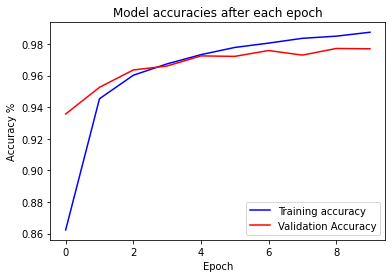

In [41]:
import matplotlib.pyplot as plt

plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Model accuracies after each epoch")
plt.plot(fit_info.epoch, fit_info.history["accuracy"], color="blue", label="Training accuracy")
plt.plot(fit_info.epoch, fit_info.history["val_accuracy"], color="red", label="Validation Accuracy")
plt.legend()
plt.show()


## Q2.D

In [28]:
## Define model ##
model = Sequential()

# Layers:
model.add(Flatten())
model.add(Dense(500, activation = "relu"))
model.add(Dense(300, activation = "relu"))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(lr = 0.1),
               metrics=["accuracy"])

epochs = 40

fit_info_q2d = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {}, Test accuracy {}".format(score[0], score[1]))


Epoch 1/40
469/469 [==============================] - 16s 32ms/step - loss: 0.6728 - accuracy: 0.8167 - val_loss: 0.2125 - val_accuracy: 0.9398
Epoch 2/40
469/469 [==============================] - 18s 38ms/step - loss: 0.2076 - accuracy: 0.9410 - val_loss: 0.1643 - val_accuracy: 0.9496
Epoch 3/40
469/469 [==============================] - 17s 36ms/step - loss: 0.1489 - accuracy: 0.9567 - val_loss: 0.1213 - val_accuracy: 0.9636
Epoch 4/40
469/469 [==============================] - 14s 30ms/step - loss: 0.1137 - accuracy: 0.9673 - val_loss: 0.1098 - val_accuracy: 0.9681
Epoch 5/40
469/469 [==============================] - 13s 27ms/step - loss: 0.0901 - accuracy: 0.9734 - val_loss: 0.1003 - val_accuracy: 0.9713
Epoch 6/40
469/469 [==============================] - 15s 32ms/step - loss: 0.0738 - accuracy: 0.9790 - val_loss: 0.0821 - val_accuracy: 0.9736
Epoch 7/40
469/469 [==============================] - 16s 35ms/step - loss: 0.0617 - accuracy: 0.9832 - val_loss: 0.0826 - val_accuracy:

Now we plot the accuracies during the different epochs.

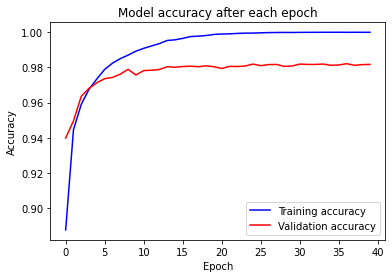

In [37]:
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Model accuracy after each epoch")
plt.plot(fit_info_q2d.epoch, fit_info_q2d.history["accuracy"], color="blue", label="Training accuracy")
plt.plot(fit_info_q2d.epoch, fit_info_q2d.history["val_accuracy"], color="red", label="Validation accuracy")
plt.legend()
plt.show()


The best accuracy we got is 0.9821

In [35]:
from tensorflow.keras import regularizers

results_q2d = []

# for factor in (1e-6, 1e-5, 5e-5 ,1e-4, 1e-3):
for factor in (1e-6, ):
    for i in range(3):
        ## Define model ##
        model = Sequential()

        # Layers:
        model.add(Flatten())
        model.add(Dense(500, activation = "relu", kernel_regularizer=regularizers.l2(l2=factor)))
        model.add(Dense(300, activation = "relu", kernel_regularizer=regularizers.l2(l2=factor)))
        model.add(Dense(num_classes, activation="softmax"))

        model.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.SGD(lr = 0.1),
                    metrics=["accuracy"])

        epochs = 15

        fit_info_tmp = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)

        results_q2d.append([factor, i, fit_info_tmp, score])


Epoch 1/15
469/469 [==============================] - 13s 27ms/step - loss: 0.6690 - accuracy: 0.8152 - val_loss: 0.2137 - val_accuracy: 0.9370
Epoch 2/15
469/469 [==============================] - 14s 29ms/step - loss: 0.2083 - accuracy: 0.9413 - val_loss: 0.1571 - val_accuracy: 0.9525
Epoch 3/15
469/469 [==============================] - 13s 28ms/step - loss: 0.1470 - accuracy: 0.9584 - val_loss: 0.1254 - val_accuracy: 0.9619
Epoch 4/15
469/469 [==============================] - 13s 27ms/step - loss: 0.1125 - accuracy: 0.9674 - val_loss: 0.1088 - val_accuracy: 0.9669
Epoch 5/15
469/469 [==============================] - 13s 27ms/step - loss: 0.0916 - accuracy: 0.9741 - val_loss: 0.0929 - val_accuracy: 0.9726
Epoch 6/15
469/469 [==============================] - 12s 26ms/step - loss: 0.0756 - accuracy: 0.9789 - val_loss: 0.0856 - val_accuracy: 0.9730
Epoch 7/15
469/469 [==============================] - 13s 27ms/step - loss: 0.0626 - accuracy: 0.9832 - val_loss: 0.0952 - val_accuracy:

An information that is not given on the MNIST database is how confident we are in the number, since some handwriting can't even be accuractely red by human people.
Hinton didn't gave us its hyperparameters as well.


## Q3.A

In [47]:
from tensorflow.keras import layers

model = keras.Sequential()

model.add(keras.Input(shape=input_shape))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=["accuracy"])

epochs = 15

fit_info_cnn = model.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: {}, Test accuracy {}".format(score[0], score[1]))


Epoch 1/15
  6/469 [..............................] - ETA: 2:14 - loss: 2.2941 - accuracy: 0.1342

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab83f1d1-4f39-4251-b899-1ad25d544179' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>